# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gensim.downloader as api
from sklearn.manifold import TSNE

from utils import load_data

# Loading the Data

Load the training data and test data from the [Pavlick Formality Scores dataset](https://huggingface.co/datasets/osyvokon/pavlick-formality-scores). This dataset contains text samples with corresponding formality scores ranging from -3 (informal) to +3 (formal). As this is a simple exploratory visualisation of the dataset, the training set and test set are concatenated so that the full dataset is used in each visualisation.

For binary classification purposes, a binary dataset is also generated by applying a threshold value to the formality scores (e.g. absolute value > 1) so that only extreme instances (very informal or very formal) are retained. This dataset (binary_df) will be visualised separately later in the script.

In [2]:
threshold = 1.5

train_df, test_df = load_data()

combined_df = pd.concat([train_df, test_df])

binary_df = combined_df[combined_df['avg_score'].abs() > threshold].copy()
binary_df['formal'] = binary_df['avg_score'].apply(lambda x: 1 if x > 0 else 0) # create a binary column for formality

# Visualisations using the Full Dataset

## Distribution of Formality Scores

The first task is to explore the spread of formality values. The histogram below reflects that formality scores roughly approximate a normal distribution, though formal values are less likely to have extreme values (~+3). For the purposes of these evaluations, this is an acceptable distribution of formality scores.

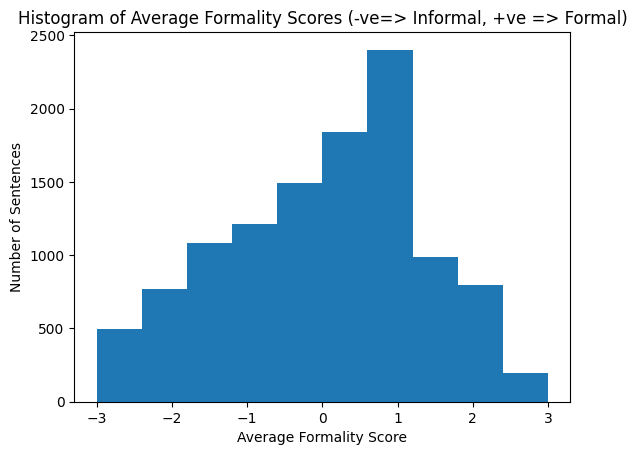

In [3]:
# illustrate spread of avg_score values
plt.hist(combined_df["avg_score"])
plt.xlabel("Average Formality Score")
plt.ylabel("Number of Sentences")
plt.title("Histogram of Average Formality Scores (-ve=> Informal, +ve => Formal)")
plt.show()

## Visualising High-Dimensional Text Data with t-distributed Stochastic Neighbour Embedding

Next, vectorise the data using the pre-trained [GloVe-25 model](https://huggingface.co/fse/glove-twitter-25). By vectorising the text data, we can then perform a dimensionality reduction to visualise it in two or three dimensions using t-SNE. The purpose here is to see if a separation appears between formal and informal instances. If such a separation is present, it suggests that it is possible to train an effective model to classify between formal and informal instances in the given dataset.

In [4]:
# Load pre-trained word embeddings from gensim library
model = api.load('glove-twitter-25')

# Vectorise the 'sentence' column of the dataframe using the pre-trained word embeddings
sentence_vectors = []
for sentence in combined_df['sentence']:
    sentence_vector = np.zeros(25, dtype=np.float32)
    for word in sentence.split():
        if word in model:
            sentence_vector += model[word]
    sentence_vectors.append(sentence_vector)


#### 1. 2D Visualisation

Reduce the dimensionality of the vectorised data to 2D and then plot the results, colour-coded based on the formality score. 

Text(0, 0.5, 't-SNE Dimension 2')

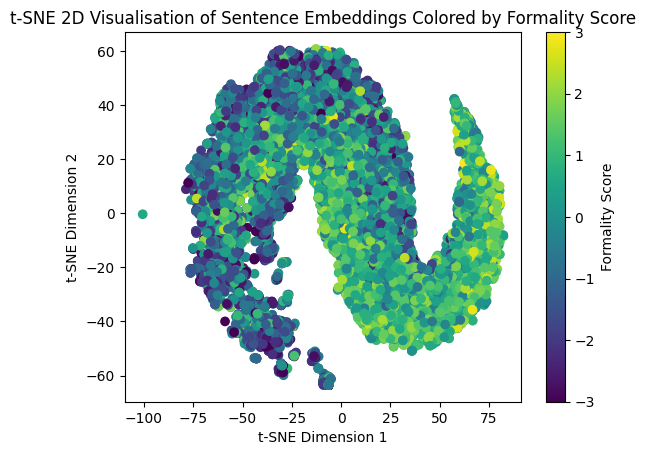

In [5]:
sentence_vectors_array = np.array(sentence_vectors) # Convert list to numpy array
tsne = TSNE(n_components=2, random_state=42)
sentence_vectors_2d = tsne.fit_transform(sentence_vectors_array) # Apply t-SNE to reduce dimensionality

plt.scatter(sentence_vectors_2d[:, 0], sentence_vectors_2d[:, 1], c=combined_df['avg_score'], cmap='viridis')
plt.colorbar(label='Formality Score')
plt.title("t-SNE 2D Visualisation of Sentence Embeddings Colored by Formality Score")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


#### 2. 3D Visualisation

Next, perform the same task but with the vectors reduced to three dimensions. 

Text(0.5, 0.92, 't-SNE 3D Visualisation of Sentence Embeddings Colored by Formality Score')

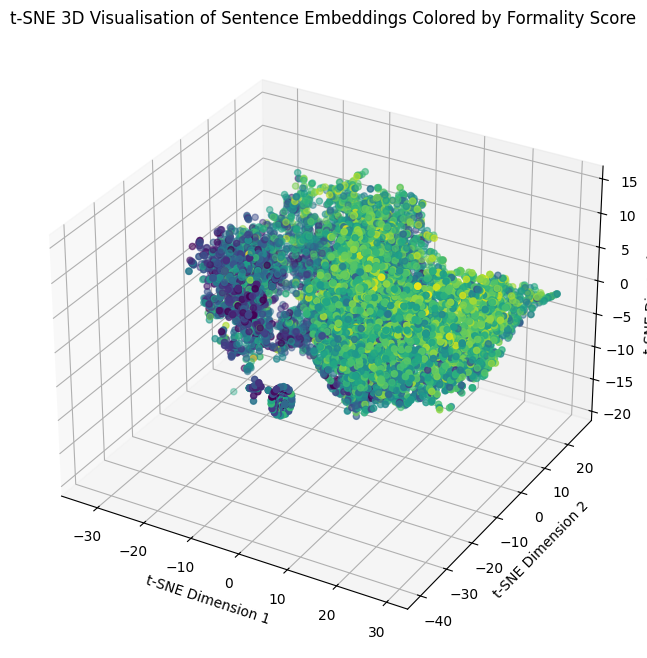

In [6]:
# perform the same t-SNE visualisation but with 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
sentence_vectors_3d = tsne.fit_transform(sentence_vectors_array)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sentence_vectors_3d[:, 0], sentence_vectors_3d[:, 1], sentence_vectors_3d[:, 2], c=combined_df['avg_score'], cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('t-SNE 3D Visualisation of Sentence Embeddings Colored by Formality Score')

An additional point of interest here is to observe the effects of the strength of the formality scores. Extreme instances (very low and very high formality scores) appear to be more likely to be positioned at the extreme ends of the distribution, which suggests that greater differences in formality scores represent a greater difference in content. This is as expected, and further supports the idea of generating a binary dataset using a threshold value. Changing this binary threshold will directly influence the difficulty of the binary classification task overall: a low threshold means a more challenging classification task, while a high threshold means an easier classification task (as the model will only be facing extreme, easily distinguishable examples).

# Binary Dataset

Now perform the same visualizations using binary data.

## Dataset Balance

First, perform a quick check that the binary dataset is roughly balanced. This can be achieved using a basic bar chart.

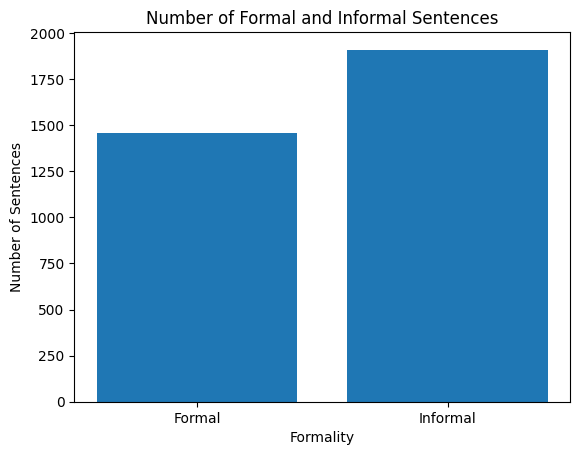

In [7]:
# plot the sum of formal and informal sentences
plt.bar(['Formal', 'Informal'], [binary_df['formal'].sum(), binary_df['formal'].shape[0] - binary_df['formal'].sum()])
plt.xlabel("Formality")
plt.ylabel("Number of Sentences")
plt.title("Number of Formal and Informal Sentences")
plt.show()


## Vectorisation, Dimensionality Reduction (t-SNE) and Visualisation

In [8]:
# Load pre-trained word embeddings from gensim library
model = api.load('glove-twitter-25')

# Vectorise the 'sentence' column of the dataframe using the pre-trained word embeddings
sentence_vectors = []
for sentence in binary_df['sentence']:
    sentence_vector = np.zeros(25, dtype=np.float32)
    for word in sentence.split():
        if word in model:
            sentence_vector += model[word]
    sentence_vectors.append(sentence_vector)


### 1. 2D Visualisation

Text(0, 0.5, 't-SNE Dimension 2')

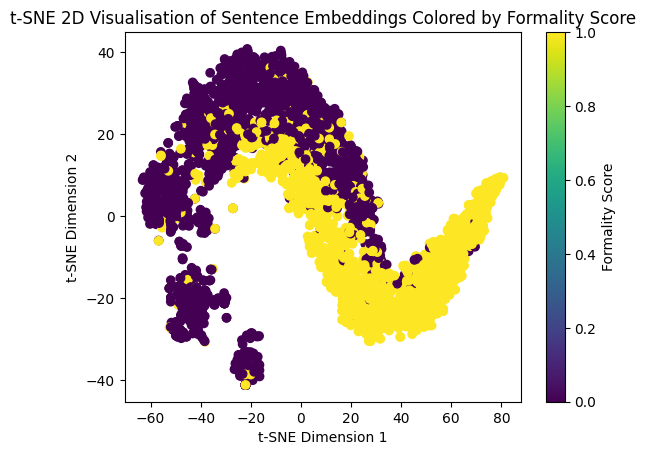

In [9]:
sentence_vectors_array = np.array(sentence_vectors) # Convert list to numpy array
tsne = TSNE(n_components=2, random_state=42)
sentence_vectors_2d = tsne.fit_transform(sentence_vectors_array) # Apply t-SNE to reduce dimensionality

plt.scatter(sentence_vectors_2d[:, 0], sentence_vectors_2d[:, 1], c=binary_df['formal'], cmap='viridis')
plt.colorbar(label='Formality Score')
plt.title("t-SNE 2D Visualisation of Sentence Embeddings Colored by Formality Score")
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


### 2. 3D Visualisation

Text(0.5, 0.92, 't-SNE 3D Visualisation of Sentence Embeddings Colored by Formality Score')

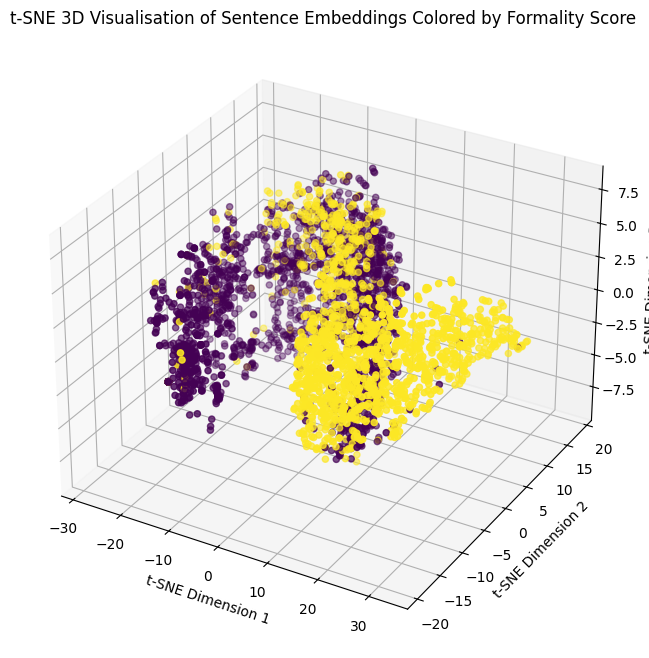

In [10]:
# perform the same t-SNE visualisation but with 3 dimensions
tsne = TSNE(n_components=3, random_state=42)
sentence_vectors_3d = tsne.fit_transform(sentence_vectors_array)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sentence_vectors_3d[:, 0], sentence_vectors_3d[:, 1], sentence_vectors_3d[:, 2], c=binary_df['formal'], cmap='viridis')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('t-SNE 3D Visualisation of Sentence Embeddings Colored by Formality Score')

Note how a very clear separation between the two classes can be seen. This indicates that the data is separable, and an effective classifier can be trained. Therefore, model performance on this dataset should give an indication of its overall ability to distinguish between formal and informal instances. 